# Set up Environment

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%load_ext autoreload
%autoreload 2

# Import functions in scripts
import os
import sys
module_path = os.path.abspath(os.path.join('../scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
from proj1_helpers import *
from implementations import *

# Load the data

In [22]:
targets, traindata, ids = load_csv_data("../data/train.csv",False)
nr_traindata, nr_columns = traindata.shape
print(traindata.shape)

(250000, 30)


In [23]:
with open('../data/train.csv', newline='') as f:
    reader = csv.reader(f)
    headers = next(reader)
headers = np.array(headers[2:])   
print(headers)

['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']


In [24]:
correlation = np.corrcoef(traindata, rowvar= False)

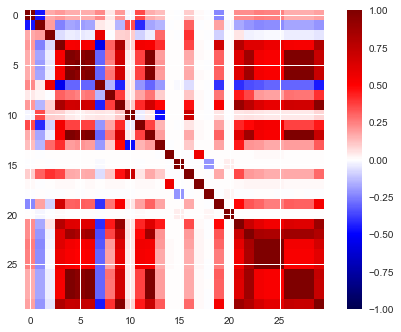

In [26]:
plt.imshow(correlation, cmap='seismic', interpolation='nearest', vmax=1, vmin = -1)
plt.colorbar()
plt.show()

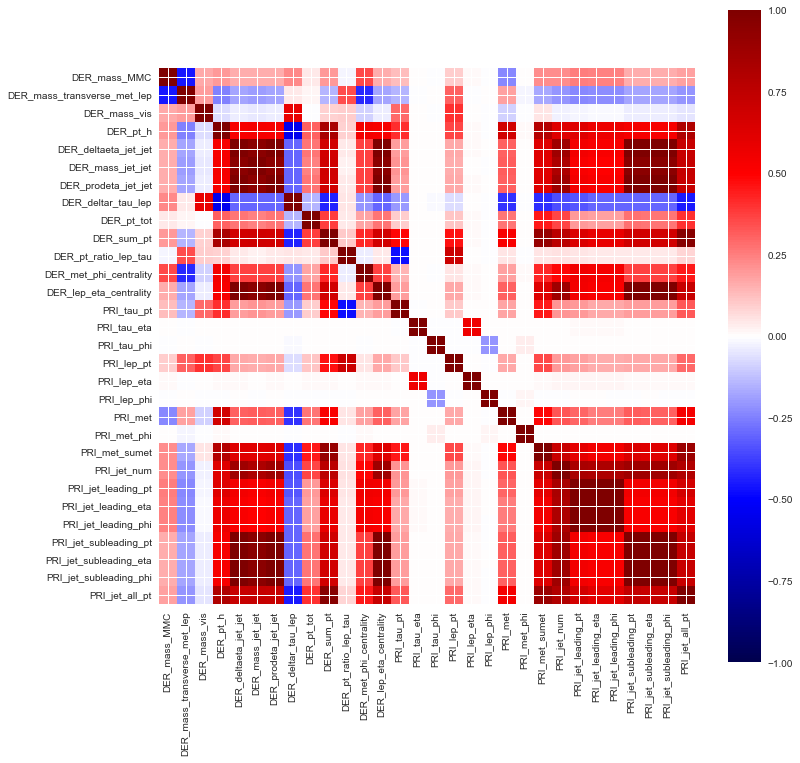

In [27]:
corr_matrix = correlation
fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(12, 12)

labels = headers

myimage = axes_cor.imshow(corr_matrix, cmap='seismic', interpolation='nearest', vmax=1, vmin = -1)

plt.colorbar(myimage)

axes_cor.set_xticks(np.arange(0,corr_matrix.shape[0], corr_matrix.shape[0]*1.0/len(labels)))
axes_cor.set_yticks(np.arange(0,corr_matrix.shape[1], corr_matrix.shape[1]*1.0/len(labels)))

axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)
plt.xticks(rotation=90)

plt.draw()

# Preprocess Data

In [ ]:
features = white_cubic_features(traindata,nr_columns,nr_traindata)

# Train Model

In [ ]:
from implementations import *
weights = np.zeros([1,nr_features])[0]

In [ ]:
nr_training_iterations = nr_traindata
gamma = 0.000001

In [ ]:
for j in range(0,300):
    for i in range(0,nr_training_iterations):
        weights = sgd_step(targets[i], features[i,:], weights, gamma)

# Evaluate Training Error

In [ ]:
train_predictions = predict_labels(weights, features)

In [ ]:
1-(nr_traindata-np.sum(train_predictions.dot(targets)))/(2*nr_traindata)

# Create Submission File

In [ ]:
test_targets, test_data, test_ids = load_csv_data("../data/test.csv",False)
nr_testdata, nr_testcolumns = test_data.shape
test_features = white_cubic_features(test_data,nr_testcolumns,nr_testdata)
test_predictions = predict_labels(weights, test_features)
create_csv_submission(test_ids, test_predictions, "Kozak_Nurmi_Tsai")